In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('tidy_df.csv')

In [ ]:
data.head()

In [5]:
from PIL import Image
img = Image.open('nhl_rink.png')

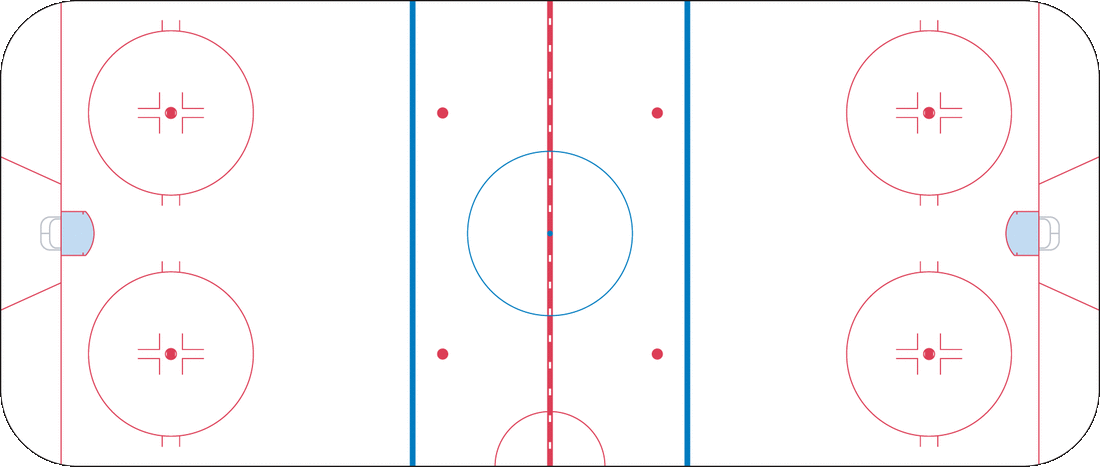

In [6]:
img

In [7]:
# Cropping image to half
# Source: https://pythontic.com/image-processing/pillow/rotate

#img transforms
print(img.size[1])
nimg = img.crop((0, 0, (img.size[0]/2), img.size[1]))
nimg= nimg.rotate(-90, expand=True)
# nimg.show()
nimg
nimg.save("semi-nhl-rink.png", format="png")

467


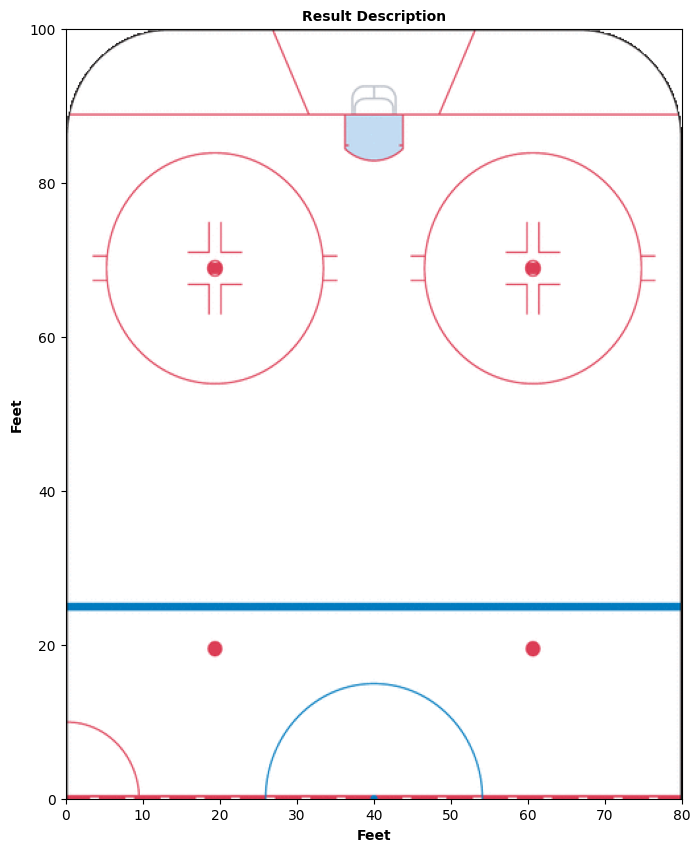

In [8]:
# Semi rink plot
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Feet', fontweight ='bold')
ax.set_ylabel('Feet', fontweight ='bold')
ax.set_title("Result Description", fontsize = 10, fontweight ='bold')
ax.imshow(nimg, extent=[0, 80, 0, 100])#, )
# plt.plot(20,20, "ob", markersize=8)

In [29]:
import seaborn as sns

In [9]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
import os

In [11]:
DATA_DIR = "data/"

In [12]:
df = pd.read_csv(os.path.join(DATA_DIR, "2016_clean.csv"))

In [13]:
df = pd.read_csv('data/2016_transformed.csv')
df.head()

game_id  period period_time                 team event  coordinates_x  \
0  2016020001     1.0       01:11  Toronto Maple Leafs  Shot          -77.0   
1  2016020001     1.0       02:53      Ottawa Senators  Shot           86.0   
2  2016020001     1.0       04:46      Ottawa Senators  Shot           33.0   
3  2016020001     1.0       06:46  Toronto Maple Leafs  Shot          -34.0   
4  2016020001     1.0       07:30  Toronto Maple Leafs  Shot          -33.0   

   coordinates_y secondary_type empty_net strength_name rinkSide  \
0            5.0     Wrist Shot       NaN           NaN    right   
1           13.0     Wrist Shot       NaN           NaN     left   
2          -15.0      Slap Shot       NaN           NaN     left   
3           28.0     Wrist Shot       NaN           NaN    right   
4          -17.0     Wrist Shot       NaN           NaN    right   

           shooter             goalie  x_transformed  y_transformed  
0  Mitchell Marner     Craig Anderson           77.0           -5.0  
1      Chris Kelly  Frederik Andersen           86.0           13.0  
2    Erik Karlsson  Frederik Andersen           33.0          -15.0  
3  Martin Marincin     Craig Anderson           34.0          -28.0  
4  Mitchell Marner     Craig Anderson           33.0           17.0

In [14]:
df_coordinates=[[df['x_transformed'][i],df['y_transformed'][i]] for i in range(len(df))]
df_coordinates=np.array(df_coordinates)
df_coordinates.tolist()

[[77.0, -5.0],
 [86.0, 13.0],
 [33.0, -15.0],
 [34.0, -28.0],
 [33.0, 17.0],
 [70.0, -1.0],
 [45.0, 36.0],
 [33.0, -18.0],
 [34.0, 20.0],
 [34.0, -25.0],
 [82.0, 3.0],
 [44.0, -6.0],
 [69.0, -8.0],
 [34.0, -1.0],
 [76.0, 28.0],
 [60.0, -34.0],
 [79.0, 13.0],
 [35.0, 28.0],
 [71.0, -21.0],
 [35.0, 22.0],
 [85.0, -14.0],
 [45.0, -27.0],
 [55.0, 21.0],
 [76.0, -14.0],
 [35.0, 19.0],
 [87.0, -8.0],
 [79.0, 3.0],
 [37.0, -28.0],
 [51.0, 25.0],
 [43.0, 29.0],
 [45.0, -22.0],
 [64.0, 7.0],
 [32.0, 7.0],
 [64.0, -3.0],
 [31.0, -6.0],
 [77.0, -36.0],
 [35.0, -14.0],
 [41.0, -16.0],
 [59.0, -10.0],
 [59.0, 40.0],
 [32.0, -31.0],
 [75.0, -31.0],
 [83.0, 5.0],
 [31.0, 32.0],
 [57.0, 9.0],
 [77.0, 16.0],
 [81.0, 4.0],
 [48.0, -34.0],
 [48.0, -33.0],
 [42.0, 20.0],
 [73.0, -13.0],
 [65.0, 36.0],
 [32.0, -5.0],
 [84.0, -7.0],
 [32.0, 19.0],
 [76.0, -33.0],
 [79.0, 13.0],
 [49.0, -11.0],
 [78.0, -24.0],
 [64.0, 38.0],
 [61.0, 37.0],
 [57.0, 9.0],
 [35.0, 36.0],
 [49.0, -13.0],
 [43.0, -18.0],
 [49.0, 

In [15]:
# Euclidean Distance of the coordinates from the center of the rink 
def euclidean_distance(df_coordinates):
    dist=[]
    for i in range(len(df_coordinates)):
        dist.append(np.sqrt(df_coordinates[i][0]**2+df_coordinates[i][1]**2))
    return dist
euclidean_distance(df_coordinates)
# df_coordinates_distance = np.array(df_coordinates_distance)
# Combining two list in the form of dataframe
df_coordinates_distance = pd.DataFrame({'df_coordinates': df_coordinates.tolist(), 'df_coordinates_distance': euclidean_distance(df_coordinates)})
df_coordinates_distance.head()
# Saving the dataframe as csv file
df_coordinates_distance.to_csv('data/2016_transformed_distance.csv')

In [6]:
from PIL import Image

467


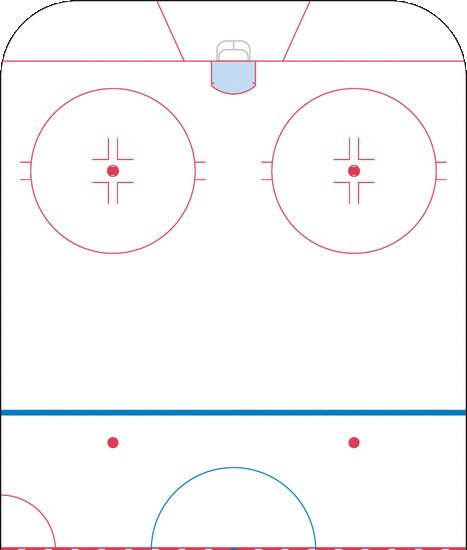

In [7]:
# Cropping image to half
# Source: https://pythontic.com/image-processing/pillow/rotate
img = Image.open('nhl_rink.png')
#img transforms
print(img.size[1])
nimg = img.crop((0, 0, (img.size[0]/2), img.size[1]))
nimg= nimg.rotate(-90, expand=True)
# nimg.show()
nimg

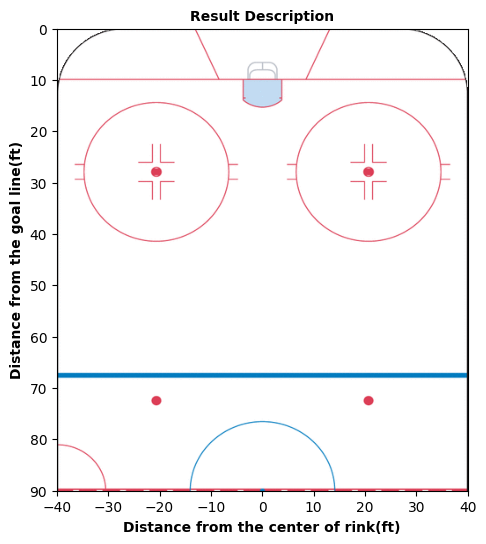

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Distance from the center of rink(ft)', fontweight ='bold')
ax.set_ylabel('Distance from the goal line(ft)', fontweight ='bold')
ax.set_title("Result Description", fontsize = 10, fontweight ='bold')
ax.imshow(nimg,  extent=[0, 40, 90, 0])#, extent=[-40, 40, 10, -10])
# plt.plot(20,20, "ob", markersize=8)

In [2]:
df_final = pd.read_csv('data/2016_diff.csv')

In [ ]:
IMG_PATH = "semi-nhl-rink.png"
fig = go.Figure()
fig.update_layout(
    width=800,
    height=500,
)
fig.add_trace (
    go.Contour(
        z=f,
        colorscale='RdBu_r',
        line_smoothing=1,
        opacity=0.7,
        contours = dict(start=-1.1,end=1.1,size=0.2),
        ncontours=25,
    ))

# Add images
fig.add_layout_image(
        dict(
            source=IMG_PATH,
            xref="x2 domain",
            yref="y2 domain",
            x=0,
            y=1,
            sizex=1,
            sizey=1,
            opacity=0.5,
            sizing= "stretch",
            layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")
fig.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objects as go
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns
from datetime import datetime

C:\Users\pupne\AppData\Local\Temp\ipykernel_16632\1768735409.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [3]:
df_final.head()

team  y_transformed  goal_dist  total  games_per_team  \
0  Anaheim Ducks          -41.0       47.0      1              82   
1  Anaheim Ducks          -40.0       33.0      1              82   
2  Anaheim Ducks          -40.0       63.0      1              82   
3  Anaheim Ducks          -39.0       16.0      1              82   
4  Anaheim Ducks          -38.0       12.0      1              82   

   average_per_hour  league_avearage  diff_percent  
0          0.012195         0.000815    174.942704  
1          0.012195         0.000815    174.942704  
2          0.012195         0.001630    152.839684  
3          0.012195         0.003260    115.627010  
4          0.012195         0.004890     85.514834

In [36]:
# Create a plot with the contour lines above the nhl rink image using plotly library 

# Create a figure with the contour lines above the nhl rink image using plotly library
fig = go.Figure()
fig.update_layout(
    width=800,
    height=800,
)
# Remove grid lines from the plot 
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Plot the contour lines with x-axis as distance from the center of the rink and y-axis as distance from the goal line and the x-axis range from 0 to 80 and y-axis range from 0 to 90
fig.add_contour(
    z=df_final['diff_percent'],
    x=df_final['goal_dist'],
    y=df_final['y_transformed'],
    colorscale='RdBu_r',
    line_smoothing=1,
    opacity=0.7,
    contours = dict(start=-1.1,end=1.1,size=0.2),
    ncontours=25,
    xaxis="x2",
    yaxis="y2",
    )
    

fig.add_trace (
    go.Contour(
        z=df_final['diff_percent'],
        colorscale='RdBu_r',
        line_smoothing=1,
        opacity=0.7,
        contours = dict(start=-1.1,end=1.1,size=0.2),
        ncontours=25,
    ))

# Add images to the plot and dont show the x-axis and y-axis
# Remove the x-axis and y-axis from the plot only for the image 
fig.add_layout_image(
        dict(
            source=nimg,
            xref="x2 domain",
            yref="y2 domain",
            x=0,
            y=1,
            sizex=1,
            sizey=1,
            opacity=0.5,
            sizing= "stretch",
            layer="below")
)


# fig.add_layout_image(

#         dict(
#             source=nimg,
#             xref="x2 domain",
#             yref="y2 domain",
#             x=0,
#             y=1,
#             sizex=1,
#             sizey=1,
#             opacity=1,
#             sizing= "stretch",
#             layer="below")
# )

# Set templates 
# fig.update_layout(template="plotly_white")
fig.show()


        


In [32]:
# def myplot(x, y, z, s, bins=1000):
#     heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=z)
#     heatmap = gaussian_filter(heatmap, sigma=s)

#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     return heatmap.T, extent

# Another way to create a function of myplot to plot the heatmap
def myplot(x, y, z, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=z)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

def plotShotMap(season_year, team, season_games):
    fig, ax = plt.subplots(figsize=(10,8))

    img = plt.imread('semi-nhl-rink.png')

    ext = [-100, 100, -42.5, 42.5]
    plt.imshow(img, zorder=0, extent=ext, aspect=1)
    # Generate some test data
    x = season_games['goal_dist']
    y = season_games['y_transformed']
    z = season_games['diff_percent']
    
    sigma = 2
    
    img, extent = myplot(x, y, z, sigma, bins=100)
    img = ax.imshow(img, extent=[0, 100, -42.5, 42.5], origin='lower', cmap='seismic', alpha=.3)#, clim=(-1, 1))
    
    cbar = plt.colorbar(img, ax=ax)
    cbar.ax.set_ylabel('Excess Shots per 1 feet', rotation = 180, labelpad=20) #rotation=270)
    ax.set_title(f"Shot map of {team} - season {season_year}/{season_year+1}")
    
    plt.show()

In [33]:
def getTeams(df):
    return df['team'].unique()


In [34]:
getTeams(df_final)

array(['Anaheim Ducks', 'Arizona Coyotes', 'Boston Bruins',
       'Buffalo Sabres', 'Calgary Flames', 'Carolina Hurricanes',
       'Chicago Blackhawks', 'Colorado Avalanche',
       'Columbus Blue Jackets', 'Dallas Stars', 'Detroit Red Wings',
       'Edmonton Oilers', 'Florida Panthers', 'Los Angeles Kings',
       'Minnesota Wild', 'Montréal Canadiens', 'Nashville Predators',
       'New Jersey Devils', 'New York Islanders', 'New York Rangers',
       'Ottawa Senators', 'Philadelphia Flyers', 'Pittsburgh Penguins',
       'San Jose Sharks', 'St. Louis Blues', 'Tampa Bay Lightning',
       'Toronto Maple Leafs', 'Vancouver Canucks', 'Washington Capitals',
       'Winnipeg Jets'], dtype=object)

In [35]:
@interact(
    season_year=widgets.IntSlider(min=2016, max=2020, step=1),
    team=getTeams(df_final)
)
def show_data(season_year, team):
    plotShotMap(season_year, team, df_final)
    display(df_final.head())

interactive(children=(IntSlider(value=2016, description='season_year', max=2020, min=2016), Dropdown(descripti…

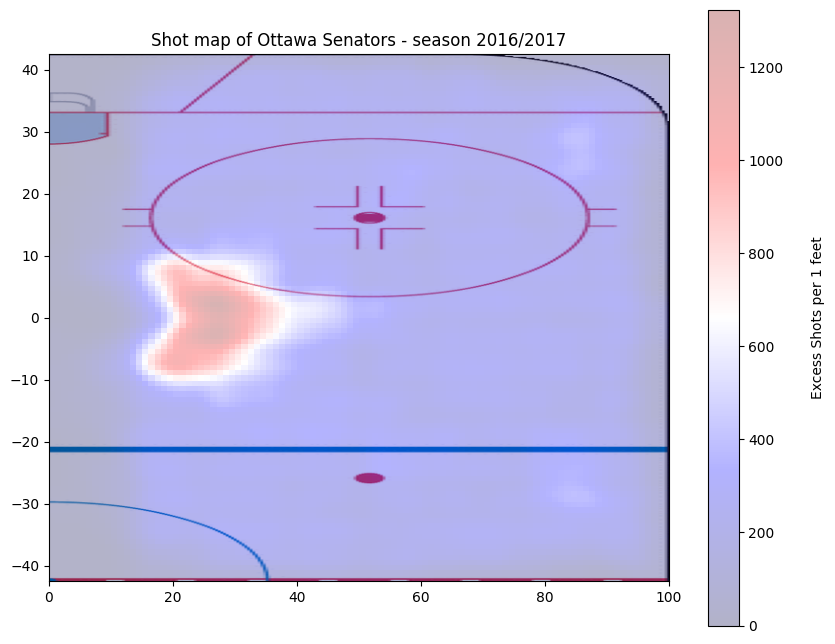

In [30]:
plotShotMap(2016, 'Ottawa Senators', df_final)
# display(season_games.head())

In [75]:
fig = go.Figure(data=go.Heatmap(
    z=df_final['diff_percent'],
    x=df_final['y_transformed'],
    y=df_final['goal_dist'],
    colorscale='Viridis',
    reversescale=True,
    showscale=False,
    hovertemplate = 'Excess Shots: %{z}<extra></extra>',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    ),
    opacity=0.2
))

# Add rink image
fig.add_layout_image(
        dict(
            source=nimg,
            xref="x",
            yref="y",
            x=-100,
            y=42.5,
            sizex=200,
            sizey=85,
            # sizing="stretch",
            opacity=1,
            layer="below")
)

# # Set the size of the heatmap
# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=600,
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=20
#     ),
#     # paper_bgcolor="LightSteelBlue",
# )

# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=500,
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     # paper_bgcolor="LightSteelBlue",
# )

fig.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            xref="paper",
            yref="paper",
            text="x: -100 to 100, y: -42.5 to 42.5",  
            showarrow=False
        )
    ]
)

# Show the plot
fig.show()


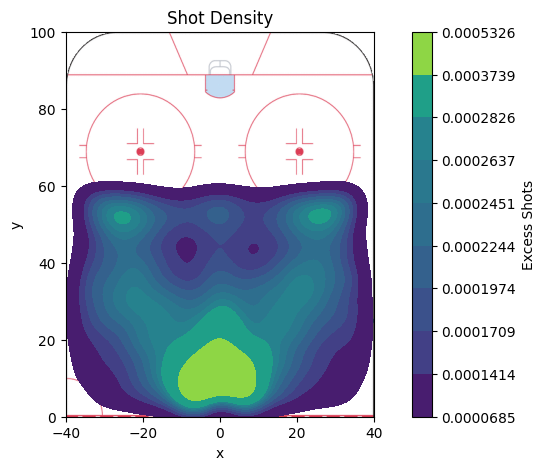

In [83]:
# Plot the kde plot using seaborn and then add the rink image below it 

def plot_image():
    # Step 1: Create the figure
    fig,ax = plt.subplots(figsize=(10,5))
    # Step 2: Plot the data
    sns.kdeplot(data=df_final, x='y_transformed', y='goal_dist', fill=True, cmap='viridis',cbar=True, cbar_kws={'label': 'Excess Shots'})
    # Step 3: Add the image
    ax.imshow(nimg, extent=[-40,40,0,100])
    # Step 4: Set the axis limits
    ax.set_xlim(-40,40)
    
    ax.set_ylim(0,100)
    # Step 5: Set the axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Step 6: Set the title
    ax.set_title('Shot Density')
    # Step 7: Show the plot
    plt.show()


plot_image()